In [536]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [537]:
df_org = pd.read_csv('D:\Quera Bootcamp\Project\Mobile-Store\Cleaning\Cleaned_df.csv')

In [538]:
selected_columns = ['Nano_SIM', 'Micro_SIM', 'Mini_SIM', 'eSIM', 'Single_SIM', 'Dual_SIM',
                    'Price', 
                    'Display_Size_inches', 'Display_Resolution_ppi',
                    'Body_Weight_g', 'Platform_OS',
                    'Brand', 'Battery_Capacity_mAh']

df = df_org.loc[:,selected_columns]

df.dropna(inplace=True)
df.shape


(3045, 13)

In [539]:
df.loc[df['Display_Size_inches'] >= 7, 'Display_Size'] = 'Large'
df.loc[df['Display_Size_inches'] < 7, 'Display_Size'] = 'Small'

sim_cols = ['Nano_SIM', 'Micro_SIM',
       'Mini_SIM', 'eSIM']

df.loc[df['eSIM'] == 1, 'Sim_Types'] = 'eSIM'
df.loc[df['Mini_SIM'] == 1, 'Sim_Types'] = 'Mini'
df.loc[df['Micro_SIM'] == 1, 'Sim_Types'] = 'Micro'
df.loc[df['Nano_SIM'] == 1, 'Sim_Types'] = 'Nano'

# for type in sim_cols:
#     df.loc[df[type] == 1, type] = type

# df['Sim_Types'] = df[sim_cols].apply(lambda row: '-'.join([r.split('_')[0] for r in row.values.astype(str) if r != '0.0']), axis=1)
# df.loc[df['Sim_Types'] == '', 'Sim_Types'] = 'None'

In [541]:
def drop_outliers_IQR(df, column_name):
    df = df.copy()
    distance = 1.5 * (np.percentile(df[column_name], 75) - np.percentile(df[column_name], 25))
    df.loc[df[column_name] > distance + np.percentile(df[column_name], 75), column_name] = np.nan
    df.loc[df[column_name] < np.percentile(df[column_name], 25) - distance, column_name] = np.nan
    return df[column_name]

def drop_outliers_Zscore(df, column_name):
    df = df.copy()
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()
    df[(df[column_name] <= mean_value - 3 * std_value) | (df[column_name] >= mean_value + 3 * std_value)] = np.nan
    return df[column_name]


In [542]:
continuous_columns = ['Price', 
                    'Display_Size_inches', 'Display_Resolution_ppi',
                    'Body_Weight_g', 'Battery_Capacity_mAh']

other_columns = ['Nano_SIM', 'Micro_SIM', 'Mini_SIM', 'eSIM', 'Single_SIM', 'Dual_SIM', 'Platform_OS','Brand','Display_Size', 'Sim_Types']

df_RemovedOutlier_IQR = pd.concat([drop_outliers_IQR(df, col_name) for col_name in continuous_columns], axis = 1)
df_RemovedOutlier_Zscore = pd.concat([drop_outliers_Zscore(df, col_name) for col_name in continuous_columns], axis = 1)

df_RemovedOutlier_IQR = pd.concat([df_RemovedOutlier_IQR, df[other_columns]], axis=1)
df_RemovedOutlier_Zscore = pd.concat([df_RemovedOutlier_Zscore, df[other_columns]], axis=1)

df_RemovedOutlier_IQR.dropna(inplace=True)
df_RemovedOutlier_Zscore.dropna(inplace=True)

df_RemovedOutlier_Zscore = df_RemovedOutlier_Zscore.reset_index().drop(columns=['index'])

yeojohnson_RemovedOutlier_Zscore = pd.concat([pd.Series(stats.yeojohnson(df_RemovedOutlier_Zscore[col_name])[0]) for col_name in continuous_columns], axis = 1)
boxcox_RemovedOutlier_Zscore = pd.concat([pd.Series(stats.boxcox(df_RemovedOutlier_Zscore[col_name])[0]) for col_name in continuous_columns], axis = 1)

yeojohnson_RemovedOutlier_Zscore.columns = continuous_columns
boxcox_RemovedOutlier_Zscore.columns = continuous_columns

yeojohnson_RemovedOutlier_Zscore = pd.concat([yeojohnson_RemovedOutlier_Zscore, df_RemovedOutlier_Zscore[other_columns]], axis=1)
boxcox_RemovedOutlier_Zscore = pd.concat([boxcox_RemovedOutlier_Zscore, df_RemovedOutlier_Zscore[other_columns]], axis=1)

df_RemovedOutlier_IQR = df_RemovedOutlier_IQR.reset_index().drop(columns=['index'])

yeojohnson_RemovedOutlier_IQR = pd.concat([pd.Series(stats.yeojohnson(df_RemovedOutlier_IQR[col_name])[0]) for col_name in continuous_columns], axis = 1)
boxcox_RemovedOutlier_IQR = pd.concat([pd.Series(stats.boxcox(df_RemovedOutlier_IQR[col_name])[0]) for col_name in continuous_columns], axis = 1)

yeojohnson_RemovedOutlier_IQR.columns = continuous_columns
boxcox_RemovedOutlier_IQR.columns = continuous_columns

yeojohnson_RemovedOutlier_IQR = pd.concat([yeojohnson_RemovedOutlier_IQR, df_RemovedOutlier_IQR[other_columns]], axis=1)
boxcox_RemovedOutlier_IQR = pd.concat([boxcox_RemovedOutlier_IQR, df_RemovedOutlier_IQR[other_columns]], axis=1)

In [543]:
df_RemovedOutlier_IQR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   2430 non-null   float64
 1   Display_Size_inches     2430 non-null   float64
 2   Display_Resolution_ppi  2430 non-null   float64
 3   Body_Weight_g           2430 non-null   float64
 4   Battery_Capacity_mAh    2430 non-null   float64
 5   Nano_SIM                2430 non-null   float64
 6   Micro_SIM               2430 non-null   float64
 7   Mini_SIM                2430 non-null   float64
 8   eSIM                    2430 non-null   float64
 9   Single_SIM              2430 non-null   float64
 10  Dual_SIM                2430 non-null   float64
 11  Platform_OS             2430 non-null   object 
 12  Brand                   2430 non-null   object 
 13  Display_Size            2430 non-null   object 
 14  Sim_Types               2430 non-null   

In [544]:
df_RemovedOutlier_Zscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   2737 non-null   float64
 1   Display_Size_inches     2737 non-null   float64
 2   Display_Resolution_ppi  2737 non-null   float64
 3   Body_Weight_g           2737 non-null   float64
 4   Battery_Capacity_mAh    2737 non-null   float64
 5   Nano_SIM                2737 non-null   float64
 6   Micro_SIM               2737 non-null   float64
 7   Mini_SIM                2737 non-null   float64
 8   eSIM                    2737 non-null   float64
 9   Single_SIM              2737 non-null   float64
 10  Dual_SIM                2737 non-null   float64
 11  Platform_OS             2737 non-null   object 
 12  Brand                   2737 non-null   object 
 13  Display_Size            2737 non-null   object 
 14  Sim_Types               2737 non-null   

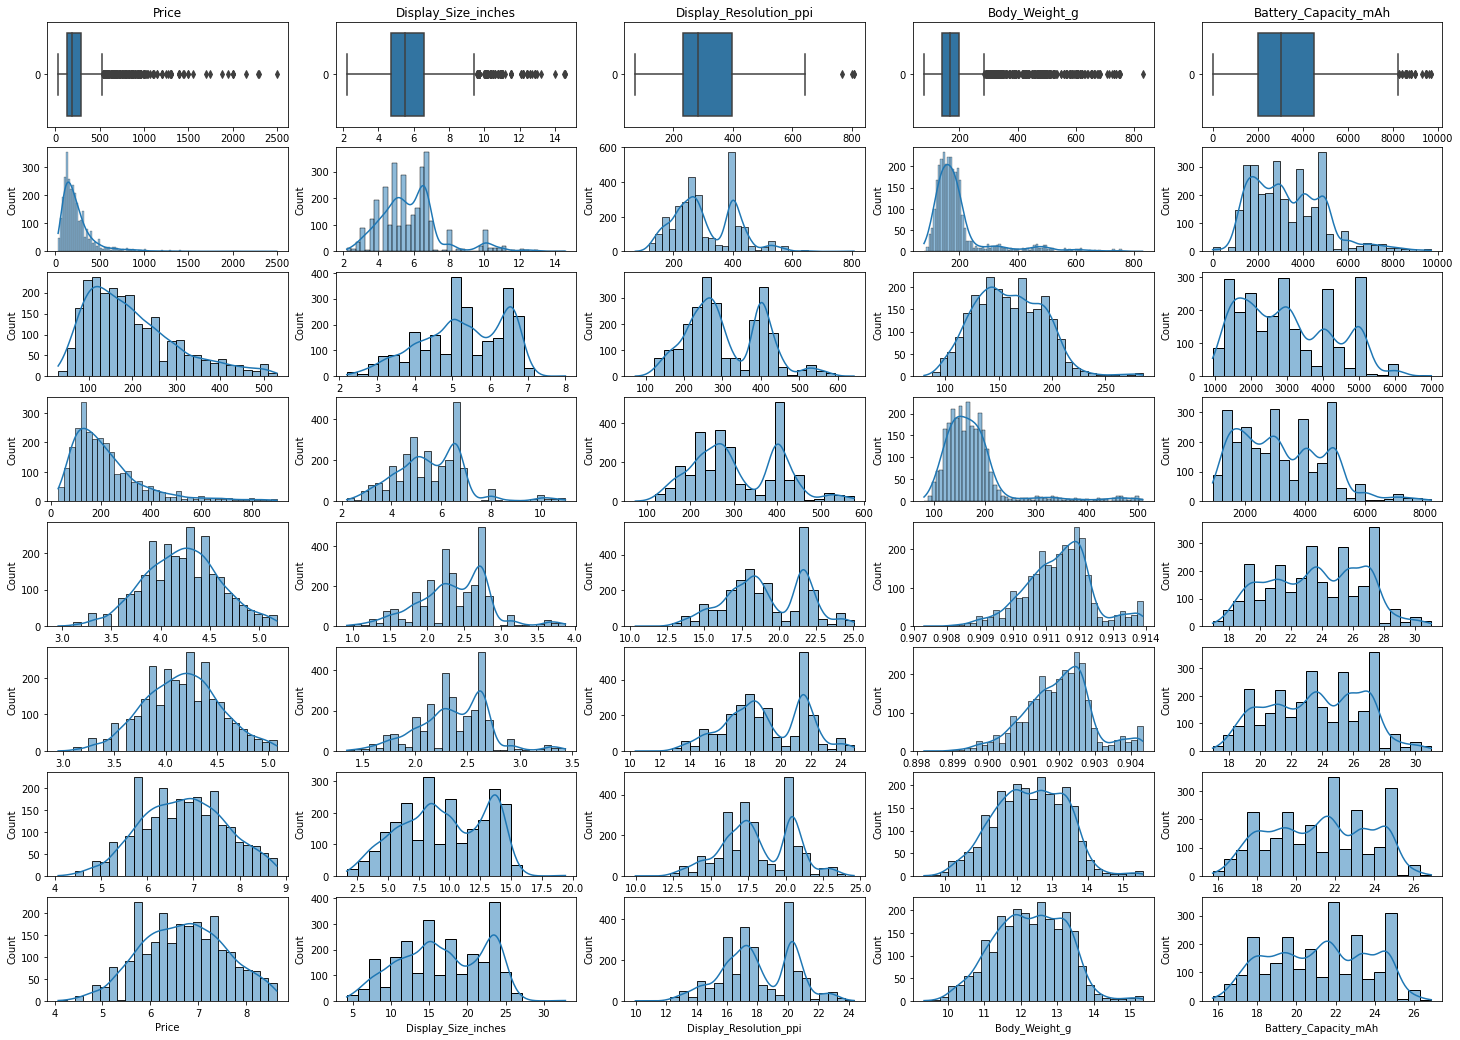

In [545]:
num_cols = 5

fig, ax = plt.subplots(nrows=8, ncols=num_cols,figsize=(25, 18))
ax = ax.reshape(-1)
for i in range(len(continuous_columns)):
    sns.boxplot(df[continuous_columns[i]], ax=ax[i], orient='h')
    ax[i].set_title(continuous_columns[i])

    sns.histplot(df[continuous_columns[i]], ax=ax[i+num_cols], fill=True, kde=True)
    sns.histplot(df_RemovedOutlier_IQR[continuous_columns[i]], ax=ax[i+num_cols*2], fill=True, kde=True)
    sns.histplot(df_RemovedOutlier_Zscore[continuous_columns[i]], ax=ax[i+num_cols*3], fill=True, kde=True)

    sns.histplot(boxcox_RemovedOutlier_Zscore[continuous_columns[i]], ax=ax[i+num_cols*4], fill=True, kde=True)
    sns.histplot(yeojohnson_RemovedOutlier_Zscore[continuous_columns[i]], ax=ax[i+num_cols*5], fill=True, kde=True)

    sns.histplot(boxcox_RemovedOutlier_IQR[continuous_columns[i]], ax=ax[i+num_cols*6], fill=True, kde=True)
    sns.histplot(yeojohnson_RemovedOutlier_IQR[continuous_columns[i]], ax=ax[i+num_cols*7], fill=True, kde=True)


plt.show()

In [546]:
# Normality tests
def normlity_test(df, column_name):
    normality_test_dict = {}

    normality_test_dict[f'Shapiro_{column_name}'] = stats.shapiro(df[column_name])[1]
    normality_test_dict[f'Dagostino_{column_name}'] = stats.normaltest(df[column_name])[1]
    
    return normality_test_dict

In [547]:
normality_test_result = pd.concat([pd.concat([pd.Series(normlity_test(df_org, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(df, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(df_RemovedOutlier_IQR, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(boxcox_RemovedOutlier_IQR, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(yeojohnson_RemovedOutlier_IQR, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(df_RemovedOutlier_Zscore, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(boxcox_RemovedOutlier_Zscore, col)) for col in continuous_columns]),
                                  pd.concat([pd.Series(normlity_test(yeojohnson_RemovedOutlier_Zscore, col)) for col in continuous_columns])], axis = 1)
normality_test_result.columns = ['Original DataFrame', 'No NaN DataFrame', 'IQR DataFrame', 'IQR Boxcocx', 'IQR Yeojohnson', 'Zscore DataFrame', 'Zscore Boxcocx', 'Zscore Yeojohnson']

In [548]:
normality_test_result

,Original DataFrame,No NaN DataFrame,IQR DataFrame,IQR Boxcocx,IQR Yeojohnson,Zscore DataFrame,Zscore Boxcocx,Zscore Yeojohnson
Shapiro_Price,1.0,0.000000e+00,2.532985e-33,1.573803e-10,1.388210e-10,0.000000e+00,3.923926e-06,3.453455e-06
Dagostino_Price,NaN,0.000000e+00,7.591244e-64,1.185019e-12,7.431109e-13,4.394936e-211,3.963328e-02,3.228971e-02
Shapiro_Display_Size_inches,1.0,4.612763e-39,6.953800e-27,9.819442e-26,1.160210e-25,3.177311e-30,2.075180e-23,2.856702e-23
Dagostino_Display_Size_inches,NaN,4.375417e-148,2.385616e-44,1.906890e-120,4.105613e-122,6.213921e-62,3.819482e-06,1.330575e-05
Shapiro_Display_Resolution_ppi,1.0,5.762147e-30,1.914997e-26,8.439145e-22,8.381395e-22,7.004523e-28,1.325189e-23,1.310382e-23
Dagostino_Display_Resolution_ppi,NaN,1.547509e-28,2.684557e-23,1.955828e-21,1.704503e-21,1.290839e-36,4.850465e-42,3.852466e-42
Shapiro_Body_Weight_g,1.0,0.000000e+00,7.666640e-16,4.613208e-10,4.504902e-10,0.000000e+00,2.575476e-16,2.745926e-16
Dagostino_Body_Weight_g,NaN,0.000000e+00,5.069704e-12,1.576549e-03,1.538273e-03,0.000000e+00,7.931320e-04,8.804365e-04
Shapiro_Battery_Capacity_mAh,1.0,2.540357e-32,4.424773e-30,6.559506e-25,6.529251e-25,3.640787e-30,2.105798e-23,2.097461e-23
Dagostino_Battery_Capacity_mAh,NaN,1.633507e-65,2.826755e-72,9.557544e-191,8.474986e-191,2.720897e-30,2.007379e-92,1.911830e-92


In [549]:
def calc_ttest_pval(Group1, Group2):
    # Calculate sample means and standard deviations

    std_error_diff = np.sqrt((np.var(Group1) / len(Group1)) + (np.var(Group2) / len(Group2)))
    mean_diff = np.mean(Group1) - np.mean(Group2)

    # Performing an independent t-test with scipy
    t_statistic, p_value = stats.ttest_ind(Group1, Group2)
    print("T-Test Pvalue Results with scipy:", p_value)

    # Performing an independent t-test with ttable
    t_statistic = mean_diff / std_error_diff
    p_value = 2 * (1 - stats.norm.cdf(abs(t_statistic)))
    print("T-Test Pvalue Results with ttable:", p_value)
    

In [550]:
selected_df = boxcox_RemovedOutlier_Zscore

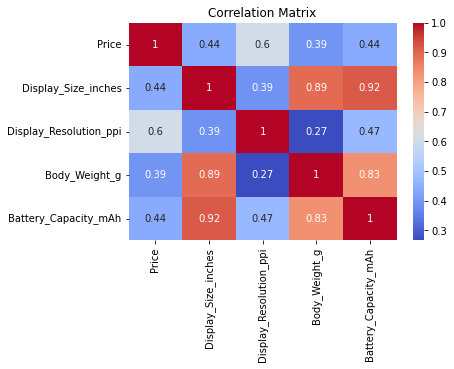

In [551]:
# plt.figure(figsize=(20, 18))
correlation_matrix = np.corrcoef(selected_df[continuous_columns], rowvar=False)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",xticklabels=continuous_columns, yticklabels=continuous_columns)
plt.title('Correlation Matrix')
plt.show()

One-way ANOVA results:
              sum_sq      df           F        PR(>F)
Sim_Type   43.032898     2.0  163.392184  9.337166e-68
Residual  360.029290  2734.0         NaN           NaN


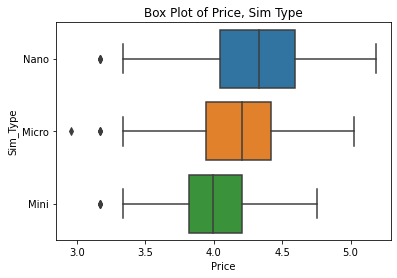

In [552]:
# Question 1: Sim Vs. Price

selected_part = selected_df[~selected_df['Sim_Types'].isin(['None'])]

df_ANOVA =  pd.DataFrame({"Price": selected_part['Price'], 
                          "Sim_Type":selected_part['Sim_Types']})

model = ols('Price ~ Sim_Type', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

sns.boxplot(x='Price', y='Sim_Type', data=df_ANOVA)
plt.title('Box Plot of Price, Sim Type')
plt.show()


T-Test Pvalue Results with scipy: 2.6599430416526847e-08
T-Test Pvalue Results with ttable: 4.213658311158497e-10


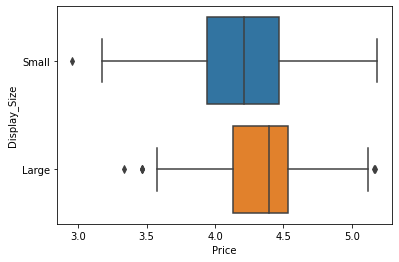

In [553]:
large_phone = selected_df[selected_df['Display_Size'] == 'Large']
small_phone = selected_df[selected_df['Display_Size'] == 'Small']

calc_ttest_pval(large_phone['Price'], small_phone['Price'])

sns.boxplot(x='Price', y='Display_Size', data=selected_df)
plt.show()

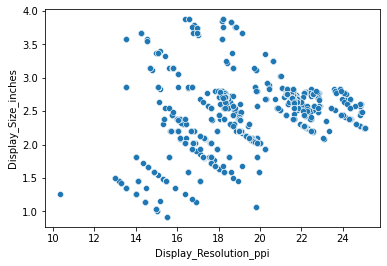

T-Test Pvalue Results with scipy: 1.0026408668708728e-44
T-Test Pvalue Results with ttable: 0.0
Mann-Whitney U statistic: 2.607364664065897e-43


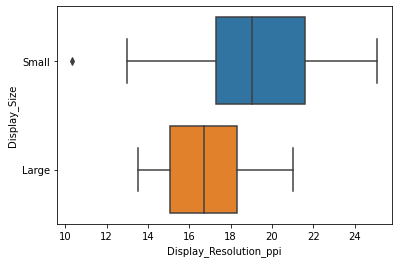

In [554]:
# Question 2: Size Vs. ppi

sns.scatterplot(data = selected_df, x='Display_Resolution_ppi', y='Display_Size_inches')
plt.show()

calc_ttest_pval(small_phone['Display_Resolution_ppi'], large_phone['Display_Resolution_ppi'])

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(small_phone['Display_Resolution_ppi'], large_phone['Display_Resolution_ppi'])
print("Mann-Whitney U statistic:", p_value)

sns.boxplot(x='Display_Resolution_ppi', y='Display_Size', data=selected_df)
plt.show()

T-Test Pvalue Results with scipy: 0.002440369869890153
T-Test Pvalue Results with ttable: 0.007934760668427243


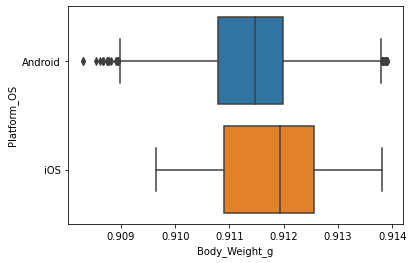

In [555]:
# Question 3: Weight Vs. OS

android = selected_df[selected_df['Platform_OS'] == 'Android']
ios = selected_df[selected_df['Platform_OS'] == 'iOS']

calc_ttest_pval(android['Body_Weight_g'], ios['Body_Weight_g'])

sns.boxplot(x='Body_Weight_g', y='Platform_OS', data=pd.concat([android, ios]))
plt.show()

One-way ANOVA results:
                 sum_sq     df           F        PR(>F)
Size        1537.184079    1.0  249.175955  9.121132e-50
Brand       2438.837452    2.0  197.666518  5.939873e-72
Size:Brand    58.830909    2.0    4.768215  8.710140e-03
Residual    5583.008977  905.0         NaN           NaN


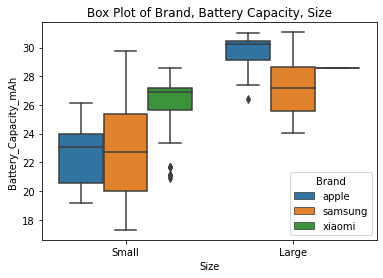

In [556]:
# Question 4: 

selected_part = selected_df.loc[selected_df['Brand'].isin(['samsung', 'apple', 'xiaomi'])]

df_ANOVA =  pd.DataFrame({"Battery_Capacity_mAh": selected_part['Battery_Capacity_mAh'], 
                          "Size":selected_part['Display_Size'], 
                          "Brand":selected_part['Brand']})

model = ols('Battery_Capacity_mAh ~ Size * Brand', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

sns.boxplot(x='Size', y='Battery_Capacity_mAh', hue='Brand', data=df_ANOVA)
plt.title('Box Plot of Brand, Battery Capacity, Size')
plt.show()

One-way ANOVA results:
                sum_sq     df          F        PR(>F)
Size          3.728705    1.0  31.488227  2.667106e-08
Brand         5.735754    2.0  24.218690  5.672482e-11
Size:Brand    0.241134    2.0   1.018167  3.616700e-01
Residual    107.166349  905.0        NaN           NaN


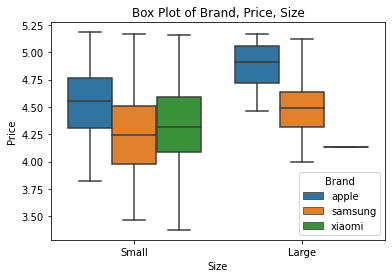

In [557]:
# Quesyion 5


df_ANOVA =  pd.DataFrame({"Price": selected_part['Price'], 
                          "Size":selected_part['Display_Size'], 
                          "Brand":selected_part['Brand']})

model = ols('Price ~ Size * Brand', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

sns.boxplot(x='Size', y='Price', hue='Brand', data=df_ANOVA)
plt.title('Box Plot of Brand, Price, Size')
plt.show()

In [558]:
statistic, p_value = stats.kruskal(large_phone.loc[(large_phone['Brand'] == 'samsung'),'Battery_Capacity_mAh'],
                                   large_phone.loc[(large_phone['Brand'] == 'apple'),'Battery_Capacity_mAh'],
                                   large_phone.loc[(large_phone['Brand'] == 'xiaomi'),'Battery_Capacity_mAh'],
                                   small_phone.loc[(small_phone['Brand'] == 'samsung'),'Battery_Capacity_mAh'],
                                   small_phone.loc[(small_phone['Brand'] == 'apple'),'Battery_Capacity_mAh'],
                                   small_phone.loc[(small_phone['Brand'] == 'xiaomi'),'Battery_Capacity_mAh'])
print(f'Kruskal Walis pvalue:', p_value) #Using non parametric method

Kruskal Walis pvalue: 1.4112668716751422e-74


In [559]:
## Difference between brands
statistic, p_value = stats.kruskal(selected_df.loc[(selected_df['Brand'] == 'samsung'),'Battery_Capacity_mAh'],
                                   selected_df.loc[(selected_df['Brand'] == 'apple'),'Battery_Capacity_mAh'],
                                   selected_df.loc[(selected_df['Brand'] == 'xiaomi'),'Battery_Capacity_mAh'])
print(f'Kruskal Walis pvalue:', p_value) #Using non parametric method

Kruskal Walis pvalue: 1.7697603194249812e-44


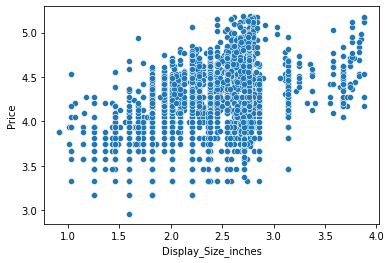

Pvalue:  1.3299715208263424e-08


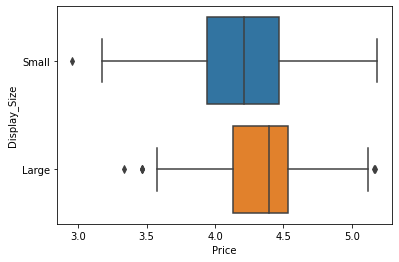

In [560]:
sns.scatterplot(data = selected_df, x='Display_Size_inches', y='Price')
plt.show()
ttest, pval = stats.ttest_ind(large_phone['Price'], small_phone['Price'], alternative='greater')
print('Pvalue: ', pval)

sns.boxplot(x='Price', y='Display_Size', data=selected_df)
plt.show()

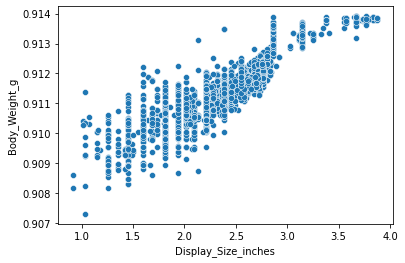

Pvalue:  1.0177940258037005e-256


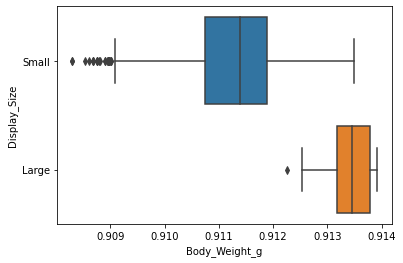

In [561]:
# Question 6:
sns.scatterplot(data = selected_df, x='Display_Size_inches', y='Body_Weight_g')
plt.show()
ttest, pval = stats.ttest_ind(large_phone['Body_Weight_g'], small_phone['Body_Weight_g'], alternative='greater')
print('Pvalue: ', pval)

sns.boxplot(x='Body_Weight_g', y='Display_Size', data=pd.concat([android, ios]))
plt.show()


In [639]:
selected_columns = ['Brand', 'Price', 'Year']

df = df_org.loc[:,selected_columns]

df.dropna(inplace=True)
df.shape

(3735, 3)

In [640]:
apple_prices_mean = df[(df['Year'] == 2023) & (df['Brand'] == 'apple')]['Price'].mean()
samsung_prices_mean = df[(df['Year'] == 2023) & (df['Brand'] == 'samsung')]['Price'].mean()
huawei_prices_mean = df[(df['Year'] == 2023) & (df['Brand'] == 'huawei')]['Price'].mean()
xiaomi_prices_mean = df[(df['Year'] == 2023) & (df['Brand'] == 'xiaomi')]['Price'].mean()
nokia_prices_mean = df[(df['Year'] == 2023) & (df['Brand'] == 'nokia')]['Price'].mean()

apple_prices_std = df[(df['Year'] == 2023) & (df['Brand'] == 'apple')]['Price'].std()
samsung_prices_std = df[(df['Year'] == 2023) & (df['Brand'] == 'samsung')]['Price'].std()
huawei_prices_std = df[(df['Year'] == 2023) & (df['Brand'] == 'huawei')]['Price'].std()
xiaomi_prices_std = df[(df['Year'] == 2023) & (df['Brand'] == 'xiaomi')]['Price'].std()
nokia_prices_std = df[(df['Year'] == 2023) & (df['Brand'] == 'nokia')]['Price'].std()

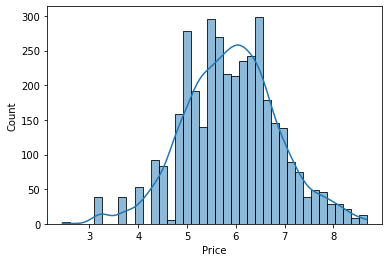

In [641]:
df_RemovedOutlier_Zscore = pd.concat([drop_outliers_Zscore(df, 'Price'), df[['Brand', 'Year']]], axis=1)
df_RemovedOutlier_Zscore.dropna(inplace=True)
df_RemovedOutlier_Zscore = df_RemovedOutlier_Zscore.reset_index().drop(columns=['index'])

boxcox_RemovedOutlier_Zscore = pd.Series(stats.boxcox(df_RemovedOutlier_Zscore['Price'])[0])
boxcox_RemovedOutlier_Zscore = pd.concat([boxcox_RemovedOutlier_Zscore, df_RemovedOutlier_Zscore[['Brand', 'Year']]], axis=1)
boxcox_RemovedOutlier_Zscore.columns = ['Price','Brand', 'Year']

sns.histplot(boxcox_RemovedOutlier_Zscore['Price'], kde=True)
plt.show()

In [642]:
df = boxcox_RemovedOutlier_Zscore
apple_prices = df[(df['Year'] == 2023) & (df['Brand'] == 'apple')]['Price']
samsung_prices = df[(df['Year'] == 2023) & (df['Brand'] == 'samsung')]['Price']
huawei_prices = df[(df['Year'] == 2023) & (df['Brand'] == 'huawei')]['Price']
xiaomi_prices = df[(df['Year'] == 2023) & (df['Brand'] == 'xiaomi')]['Price']
nokia_prices = df[(df['Year'] == 2023) & (df['Brand'] == 'nokia')]['Price']

In [643]:
print(apple_prices.shape, samsung_prices.shape, 
      huawei_prices.shape, xiaomi_prices.shape,
      nokia_prices.shape)

(5,) (23,) (28,) (41,) (17,)


In [644]:
apple_lower_bound, apple_upper_bound = stats.t.interval(alpha=0.98, df=len(apple_prices)-1, loc=np.mean(apple_prices), scale=stats.sem(apple_prices))
samsung_lower_bound, samsung_upper_bound = stats.t.interval(alpha=0.98, df=len(samsung_prices)-1, loc=np.mean(samsung_prices), scale=stats.sem(samsung_prices))
huawei_lower_bound, huawei_upper_bound = stats.t.interval(alpha=0.98, df=len(huawei_prices)-1, loc=np.mean(huawei_prices), scale=stats.sem(huawei_prices))
xiaomi_lower_bound, xiaomi_upper_bound = stats.norm.interval(0.98, loc=xiaomi_prices.mean(), scale=stats.sem(xiaomi_prices))
nokia_lower_bound, nokia_upper_bound = stats.t.interval(alpha=0.98, df=len(nokia_prices)-1, loc=np.mean(nokia_prices), scale=stats.sem(nokia_prices))

print('Apple: ', (apple_prices_mean + apple_lower_bound*apple_prices_std, apple_prices_mean + apple_upper_bound*apple_prices_std))
print('Samsung: ', (samsung_prices_mean + samsung_lower_bound*samsung_prices_std, samsung_prices_mean + samsung_upper_bound*samsung_prices_std))
print('Huawei: ', (huawei_prices_mean + huawei_lower_bound*huawei_prices_std, huawei_prices_mean + huawei_upper_bound*huawei_prices_std))
print('Xiaomi: ', (xiaomi_prices_mean + xiaomi_lower_bound*xiaomi_prices_std, xiaomi_prices_mean + xiaomi_upper_bound*xiaomi_prices_std))
print('Nokia: ', (nokia_prices_mean + nokia_lower_bound*nokia_prices_std, nokia_prices_mean + nokia_upper_bound*nokia_prices_std))

Apple:  (2284.5376752939233, 4115.07405291747)
Samsung:  (2433.8956370232954, 2758.469486445961)
Huawei:  (5883.914741248486, 6458.3966304797395)
Xiaomi:  (1522.1088934949757, 1657.4668018587083)
Nokia:  (578.0440208442659, 700.0981900523158)
